<a href="https://colab.research.google.com/github/melissatorgbi/Models/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/melissatorgbi/Models/main/data/Life%20Expectancy%20Data.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df=df.rename(columns={"Life expectancy ": "Life expectancy"})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.loc[pd.isnull(df["Schooling"])]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,28.0,79,81.0,NaN,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,27.4,80,76.0,5.72,76.0,2.0,NaN,NaN,5.6,5.6,NaN,NaN
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,26.8,81,79.0,5.81,8.0,2.4,NaN,NaN,5.8,5.7,NaN,NaN
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,26.2,82,83.0,6.14,82.0,2.9,NaN,NaN,5.9,5.9,NaN,NaN
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,25.6,83,58.0,6.42,62.0,3.3,NaN,NaN,6.1,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,111.0,28,8.48,0.0,92.0,37,63.1,33,92.0,15.14,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2806,United States of America,2003,Developed,77.2,114.0,28,8.40,0.0,92.0,56,62.4,33,91.0,15.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2807,United States of America,2002,Developed,77.0,115.0,28,8.33,0.0,88.0,41,61.7,33,9.0,14.55,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2808,United States of America,2001,Developed,76.9,115.0,28,8.25,0.0,89.0,116,6.9,33,89.0,13.73,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN


In [30]:
df=df.dropna(subset=["Schooling", "Life expectancy"])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2742 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2742 non-null   object 
 1   Year                             2742 non-null   int64  
 2   Status                           2742 non-null   object 
 3   Life expectancy                  2742 non-null   float64
 4   Adult Mortality                  2742 non-null   float64
 5   infant deaths                    2742 non-null   int64  
 6   Alcohol                          2569 non-null   float64
 7   percentage expenditure           2742 non-null   float64
 8   Hepatitis B                      2253 non-null   float64
 9   Measles                          2742 non-null   int64  
 10   BMI                             2721 non-null   float64
 11  under-five deaths                2742 non-null   int64  
 12  Polio               

In [32]:
df["Life expectancy"].describe()

count    2742.000000
mean       69.410904
std         9.331930
min        36.300000
25%        63.600000
50%        72.200000
75%        75.575000
max        89.000000
Name: Life expectancy, dtype: float64

In [33]:
df["Schooling"].describe()

count    2742.000000
mean       12.113421
std         3.150571
min         2.800000
25%        10.200000
50%        12.400000
75%        14.300000
max        20.700000
Name: Schooling, dtype: float64

<function matplotlib.pyplot.show>

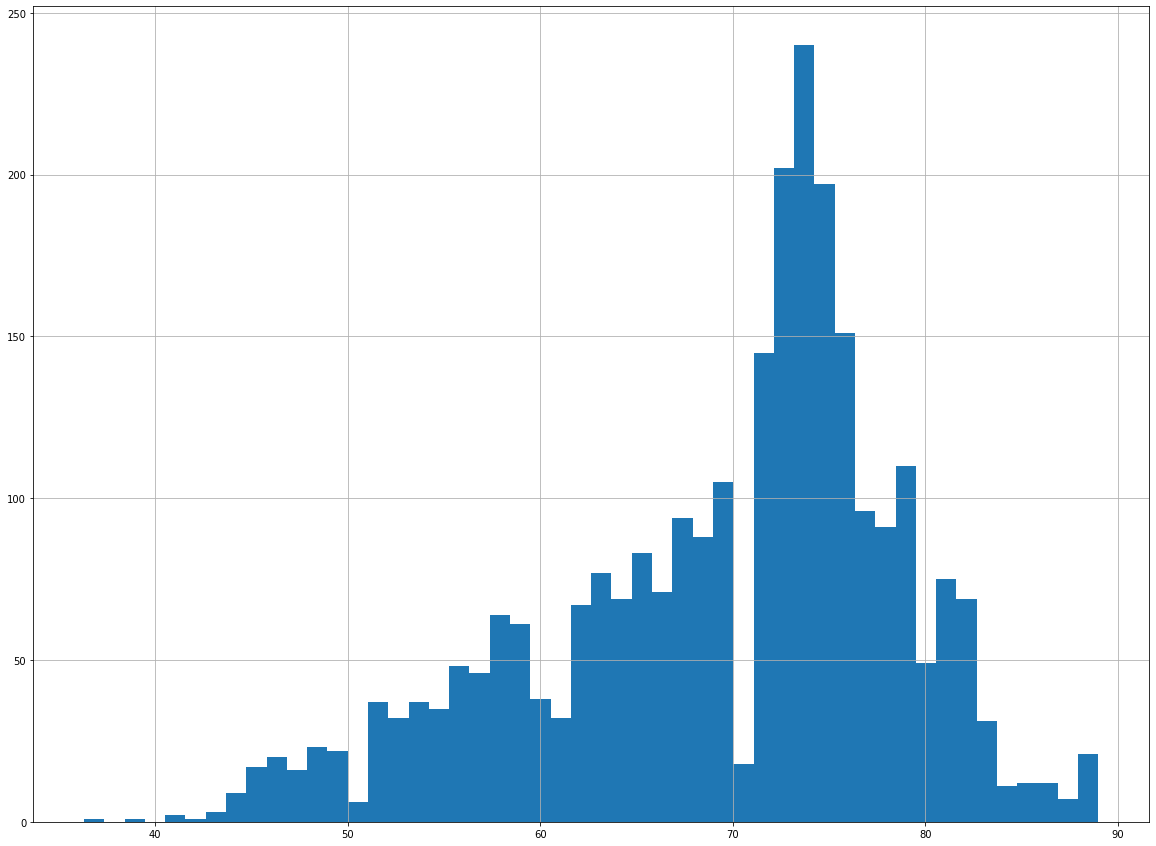

In [34]:
df['Life expectancy'].hist(bins=50, figsize=(20,15))
plt.show

<function matplotlib.pyplot.show>

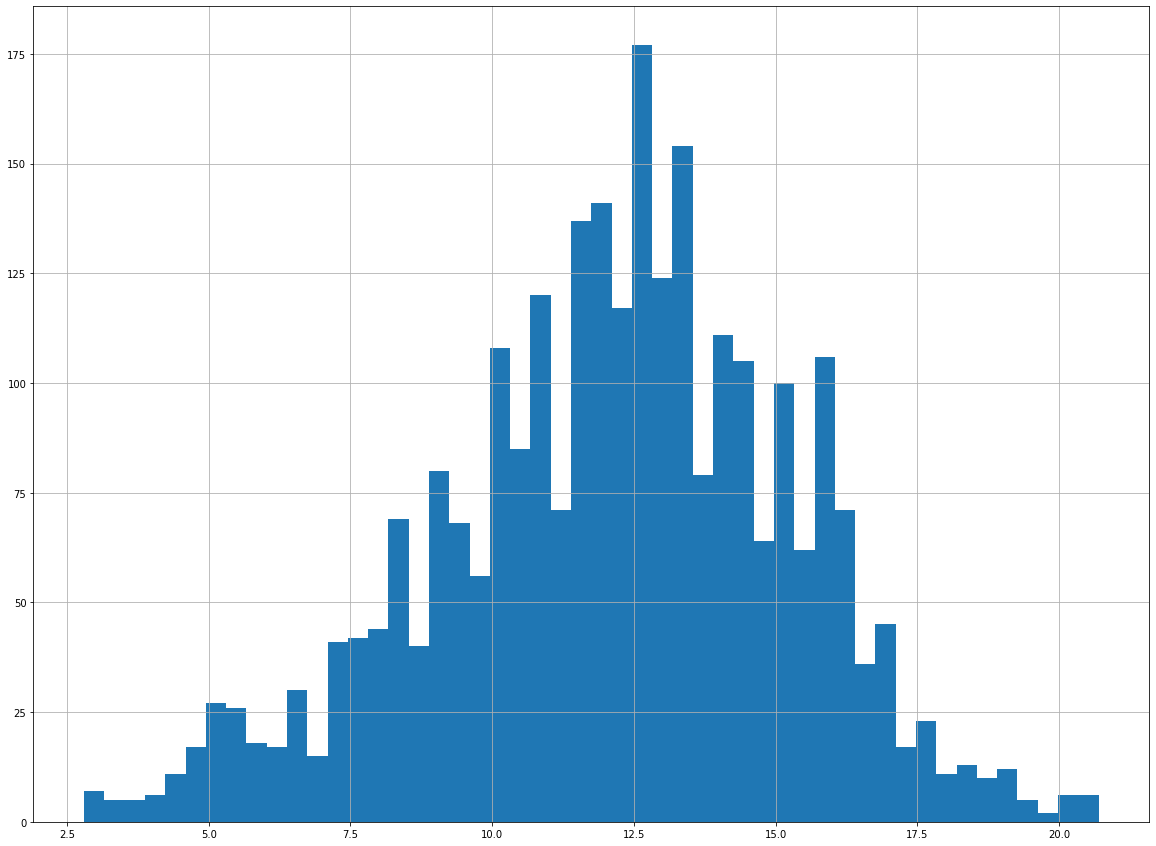

In [35]:
df['Schooling'].hist(bins=50, figsize=(20,15))
plt.show

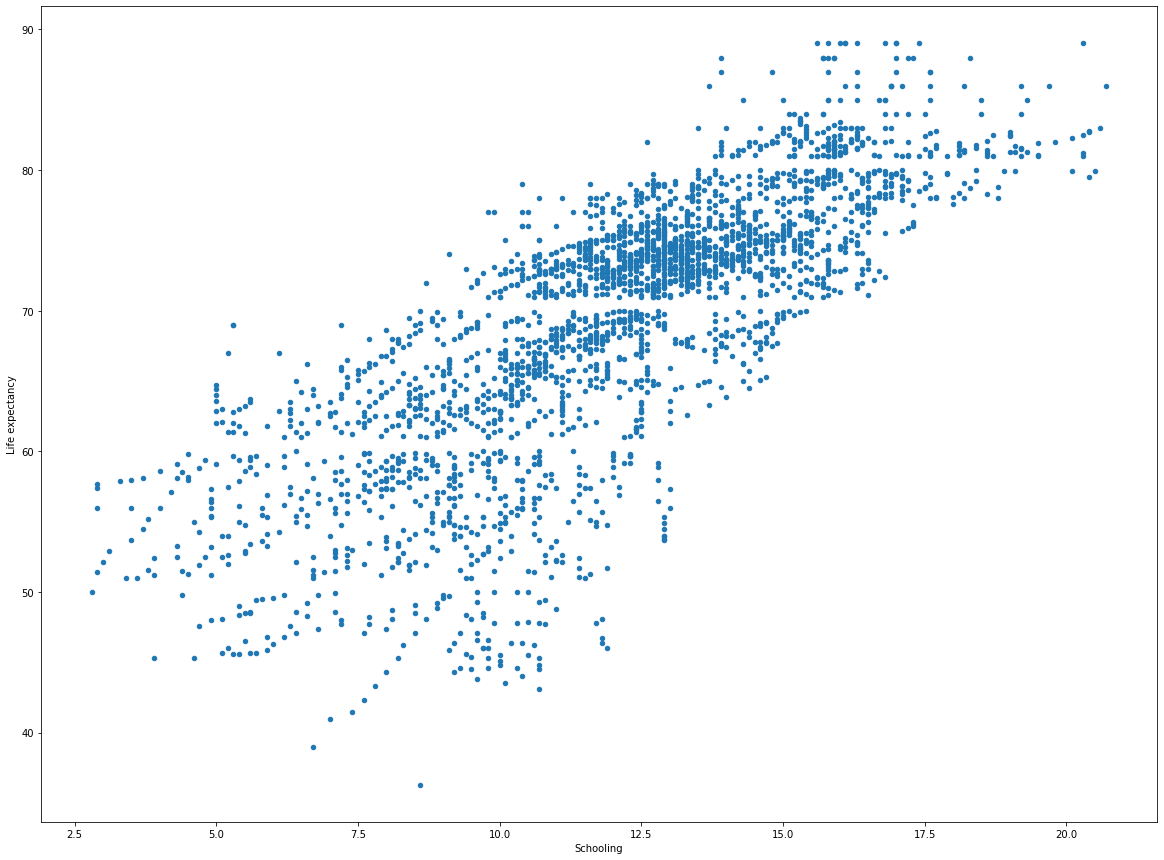

In [37]:
df.plot(kind="scatter", x="Schooling", y="Life expectancy",figsize=(20,15))

In [38]:
X=df["Schooling"].to_numpy()
y=df["Life expectancy"].to_numpy()

In [39]:
X=np.resize(X, ((np.size(X),1)))
print(np.shape(X))
y=np.resize(y, ((np.size(y),1)))
print(np.shape(y))

(2742, 1)
(2742, 1)


In [41]:
X_b=np.c_[np.ones((np.shape(X))), X]
theta=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta)

[[41.29864088]
 [ 2.32075348]]


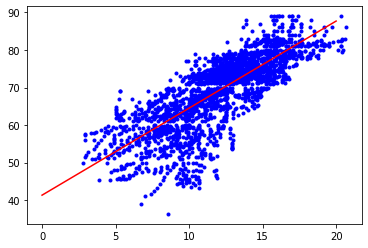

In [45]:
X_new = np.array([[0],[20]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta)
plt.plot(X,y,"b.")
plt.plot(X_new, y_predict, "r-")
plt.show()